# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Read the dataset

In [2]:
df = pd.read_csv('tweets.csv')

In [3]:
df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


# 3. Split the dataset into X and y

In [4]:
X = df['status']
Y = df['author']

# 4. Split the dataset into training set and testing set

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X, Y, test_size=0.25 , random_state=40)
#40

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer, tfidf_vectorizer = CountVectorizer() , TfidfVectorizer()
X_train_counts = count_vectorizer.fit_transform(x_train)
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_counts = count_vectorizer.transform(x_test)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [8]:
tfidf_logreg = logreg.fit(X_train_tfidf, y_train)
counts_logreg = logreg.fit(X_train_counts, y_train)

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [9]:
from sklearn import svm
svm = svm.SVC()

In [10]:
tfidf_svm  = svm.fit(X_train_tfidf, y_train)
counts_svm = svm.fit(X_train_counts, y_train)

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

#### Logistic Regression

In [11]:
tfidf_logreg_pred = logreg.predict(X_test_tfidf)
counts_logreg_pred = logreg.predict(X_test_counts)

In [12]:
from sklearn.metrics import accuracy_score
print('tfidf_logreg_pred Accuracy :', accuracy_score(y_test, tfidf_logreg_pred))
print('counts_logreg_pred Accuracy :', accuracy_score(y_test, counts_logreg_pred))

tfidf_logreg_pred Accuracy : 0.57
counts_logreg_pred Accuracy : 0.91


#### SVM

In [13]:
tfidf_svm_pred = svm.predict(X_test_tfidf)
counts_svm_pred = svm.predict(X_test_counts)

In [14]:
print('tfidf_svm_pred Accuracy :', accuracy_score(y_test, tfidf_svm_pred))
print('counts_svm_pred Accuracy :', accuracy_score(y_test, counts_svm_pred))

tfidf_svm_pred Accuracy : 0.56
counts_svm_pred Accuracy : 0.91


# 9. Plot a confusion matrix for both Logistic Regression and SVM

#### Logistic Regression

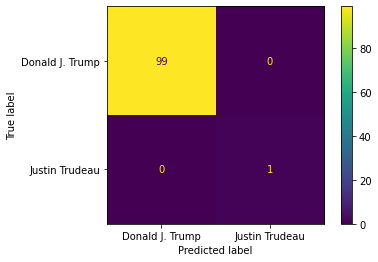

In [15]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test_tfidf, tfidf_logreg_pred);

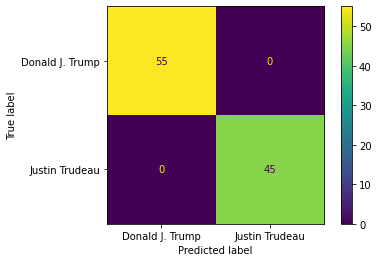

In [16]:
plot_confusion_matrix(logreg, X_test_counts, counts_logreg_pred);

#### SVM

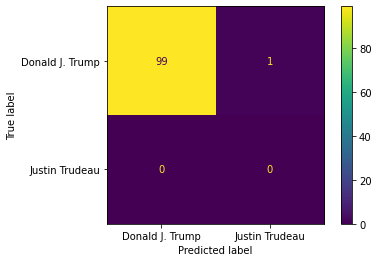

In [17]:
plot_confusion_matrix(logreg, X_test_tfidf, tfidf_svm_pred);

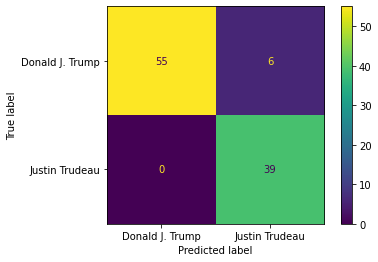

In [18]:
plot_confusion_matrix(logreg, X_test_counts, counts_svm_pred);